<a href="https://colab.research.google.com/github/woosuvin/python/blob/main/py17_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

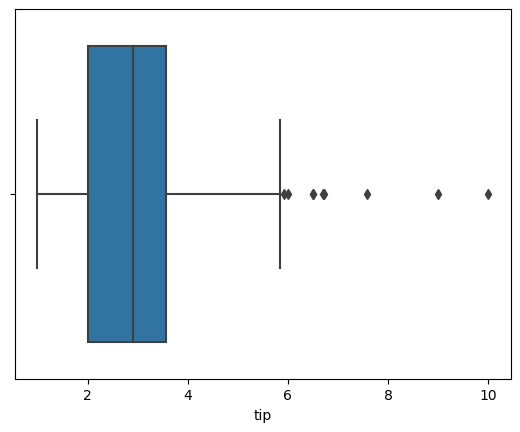

In [ ]:
sns.boxplot(data=tips, x='tip')
plt.show()

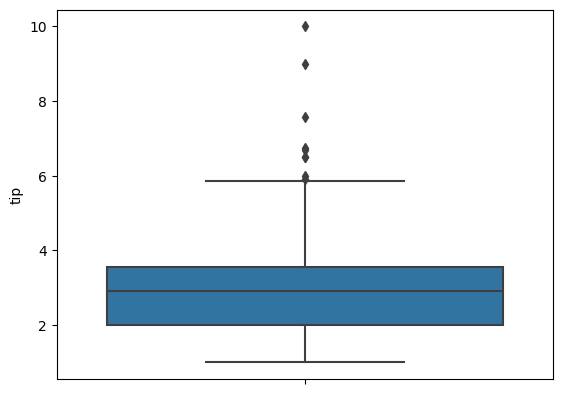

In [ ]:
sns.boxplot(data=tips, y='tip')
plt.show()

## 그룹(카테고리)별 box plot

> 성별 tip의 box plot

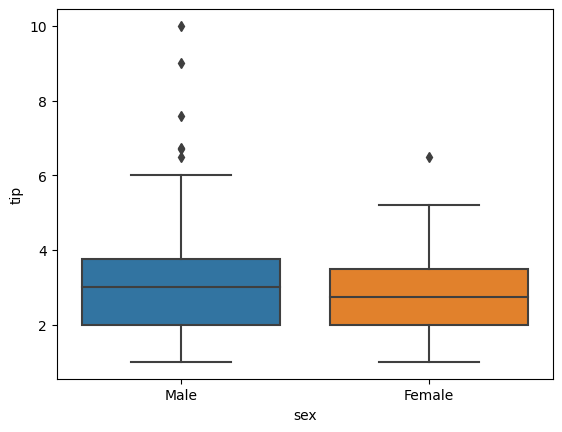

In [ ]:
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

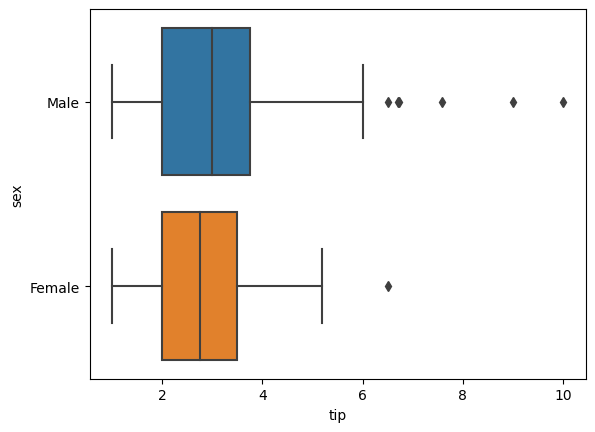

In [ ]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.show()

> 요일별 tip의 box plot

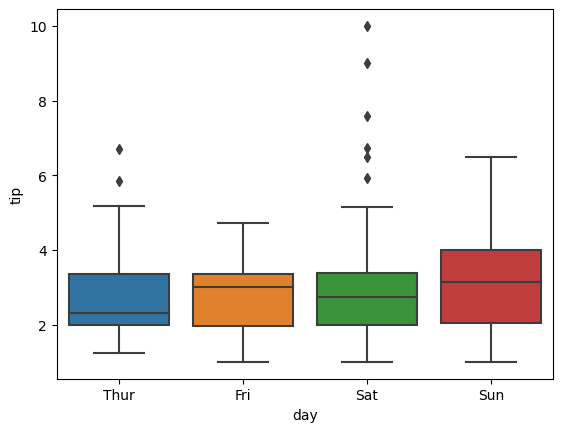

In [ ]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

* subplot 2개를 생성
* 각각의 subplot에 흡연여부별 tips의 box plot, 시간별 box plot을 그리세요.

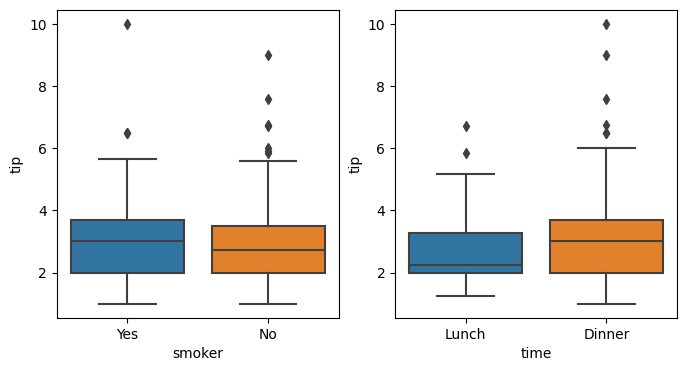

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
sns.boxplot(data=tips, x='smoker', y='tip', ax=ax[0])
sns.boxplot(data=tips, x='time', y='tip', ax=ax[1])

plt.show()

# 막대 그래프

## `countplot()` 함수
카테고리 타입 변수의 빈도수를 막대로 표현한 그래프.

<BarContainer object of 2 artists>

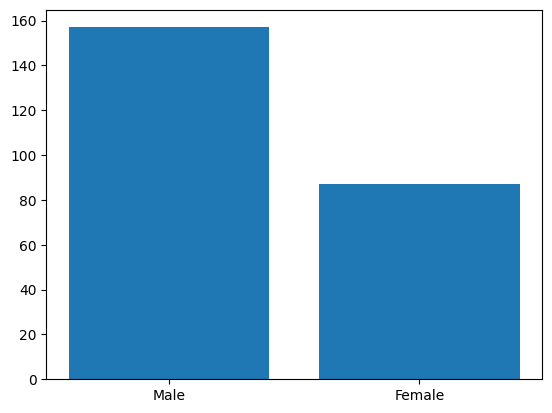

In [ ]:

sex_count = tips.sex.value_counts()
plt.bar(x=sex_count.index, height=sex_count.values)

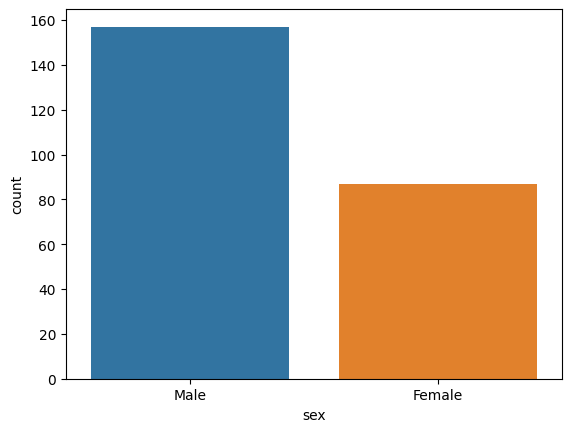

In [ ]:
# 성별 빈도수 세로 막대 그래프
sns.countplot(data=tips, x='sex')
plt.show()

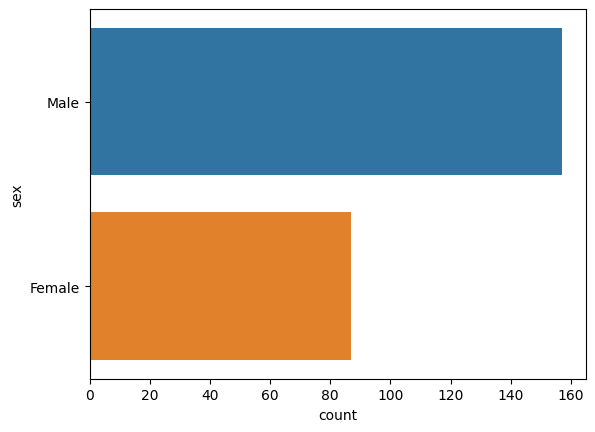

In [ ]:
# 성별 빈도수 가로 막대 그래프
sns.countplot(data=tips, y='sex')
plt.show()

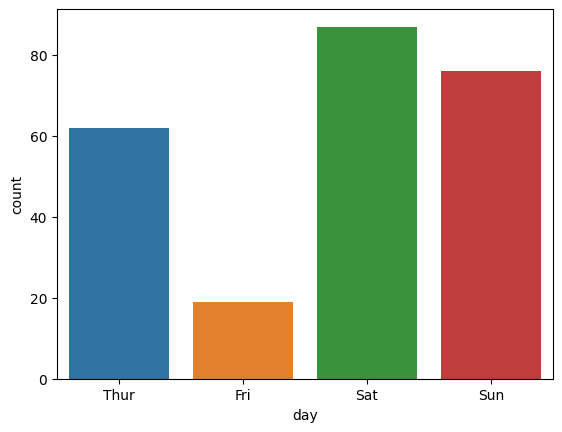

In [ ]:
# 요일 빈도수 막대 그래프
sns.countplot(data=tips, x='day')
plt.show()

In [ ]:
# 요일별 성별 빈도수
tips.groupby(['sex', 'day']).tip.count()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: tip, dtype: int64

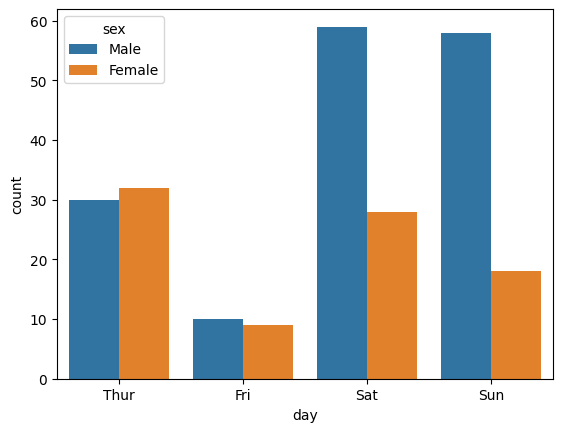

In [ ]:
sns.countplot(data=tips, x='day', hue='sex')
# hue 파라미더: 그룹(카테고리) 별로 다른 색깔을 설정할 때.
plt.show()

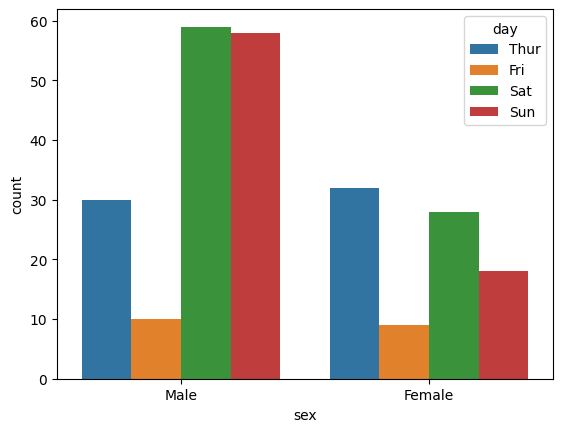

In [ ]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

In [ ]:
# 성별 흡연여부별 빈도수
tips.groupby(['sex', 'smoker']).tip.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

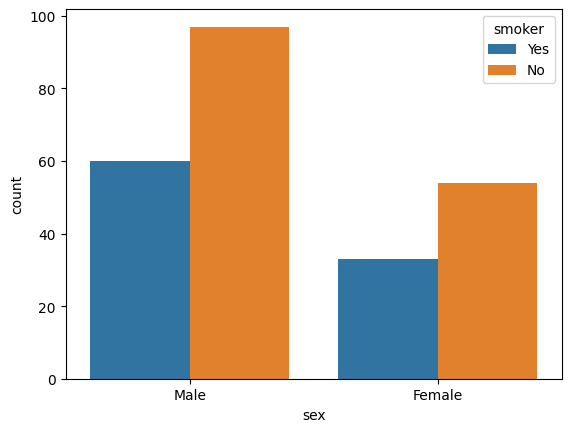

In [ ]:
sns.countplot(data=tips, x='sex', hue='smoker')
plt.show()

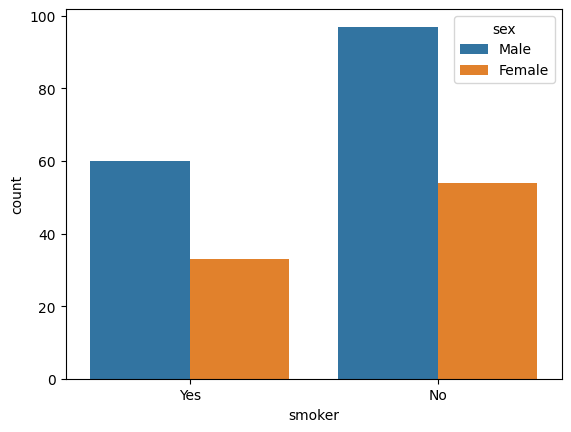

In [ ]:
sns.countplot(data=tips, x='smoker', hue='sex')
plt.show()

## `barplot()` 함수
* 그룹(카테고리) 별로 변수의 통계량(평균, 표준편차, 중앙값, ...)을 막대 그래프로 표현.
* 통계량 계산 함수의 기본값은 평균(mean).
* 카테고리 타입 변수와 숫자 타입 변수를 함께 시각화.

In [ ]:
# 성별 tip의 평균
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

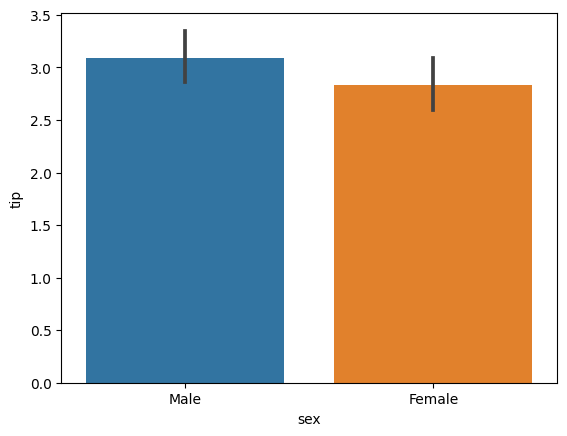

In [ ]:
sns.barplot(data=tips, x='sex', y='tip') # estimator='mean': 기본값, 평균 계산
plt.show()

In [ ]:
tips.groupby('sex').tip.median()

sex
Male      3.00
Female    2.75
Name: tip, dtype: float64

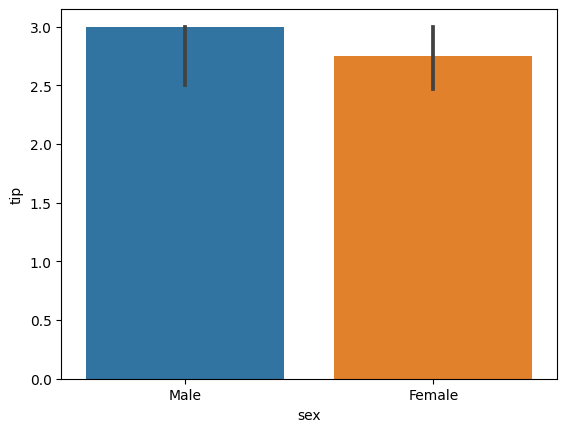

In [ ]:
sns.barplot(data=tips, x='sex', y='tip', estimator=np.median)
plt.show()

In [ ]:
tips.groupby('smoker').tip.mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

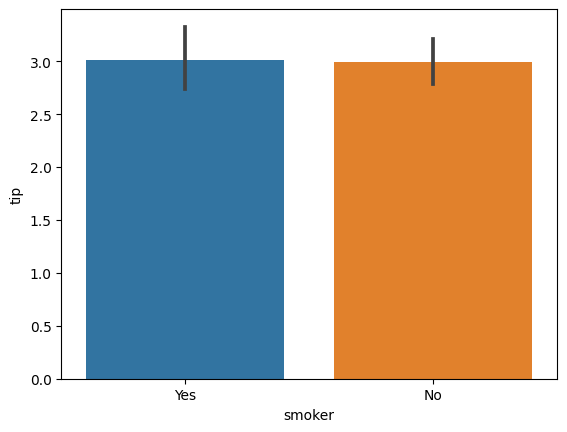

In [ ]:
# 흡연여부별 tip의 평균을 시각화
sns.barplot(data=tips, x='smoker', y='tip')
plt.show()

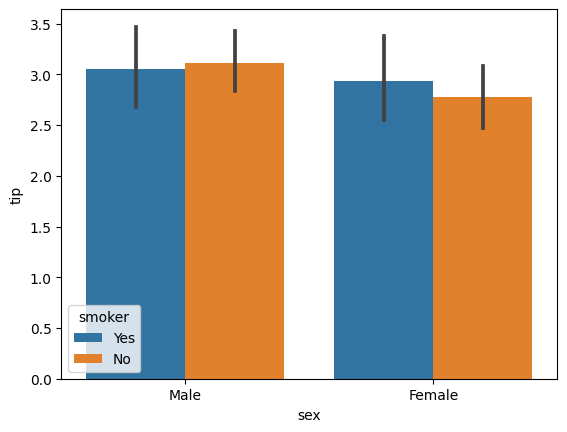

In [ ]:
# 성별 흡연여부별 tip 평균을 시각화
sns.barplot(data=tips, x='sex', y='tip', hue='smoker')
plt.show()

# 산점도: `scatterplot()`

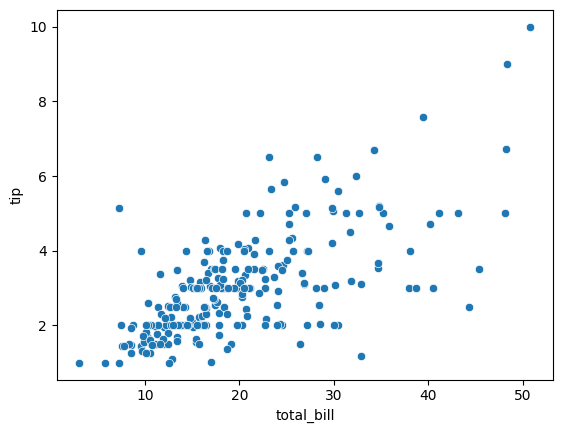

In [ ]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

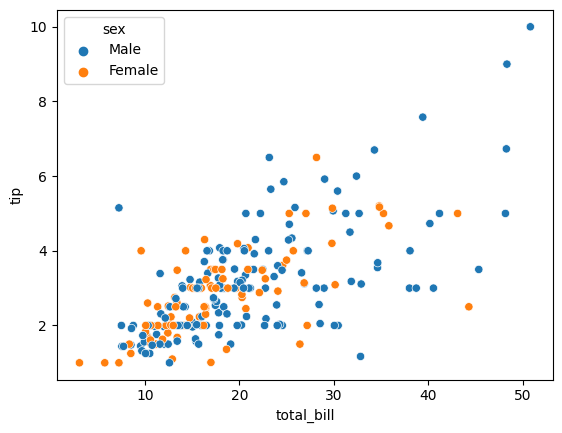

In [ ]:
# tip ~ total_bill, 성별 따라 따라 점 색깔 다르게 표현
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

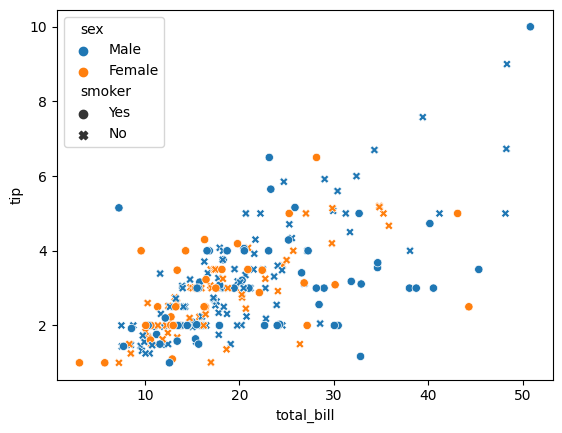

In [ ]:
# tip ~ total_bill, 성별 따라 따라 점 색깔 다르게 표현, 흡연여부 따라 따라 점 모양 다르게 표현
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='sex',
                style='smoker'
                )
plt.show()

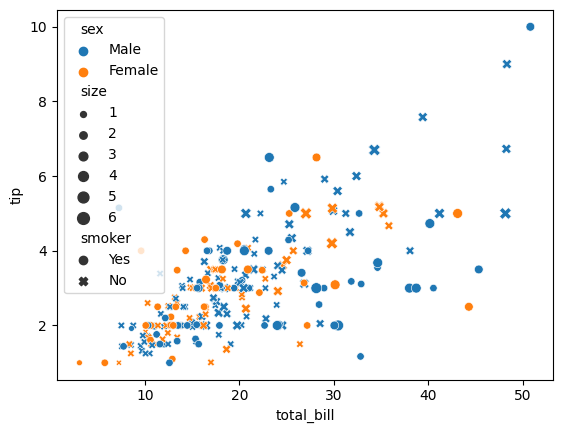

In [ ]:
# tip ~ total_bill, 성별에 따라 점 색깔 다르게, 흡연여부 따라 점 모양 다르게, 점 크기 인원수에 따라 다르게
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='sex',
                style='smoker',
                size='size'
                )
plt.show()

# 카테고리 그래프: `catplot()`
카테고리 별로 subplot들을 생성하고 통계값(평균, 중앙값, ...) 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

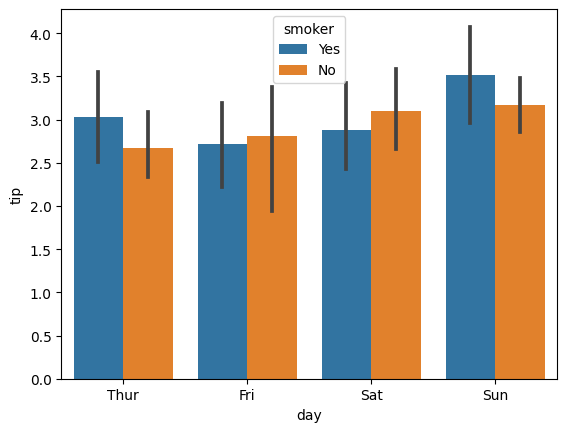

In [ ]:
# 요일별, 흡연여부별 팁의 평균을 막대 그래프로 표현
sns.barplot(data=tips, x='day', y='tip', hue='smoker')
plt.show()

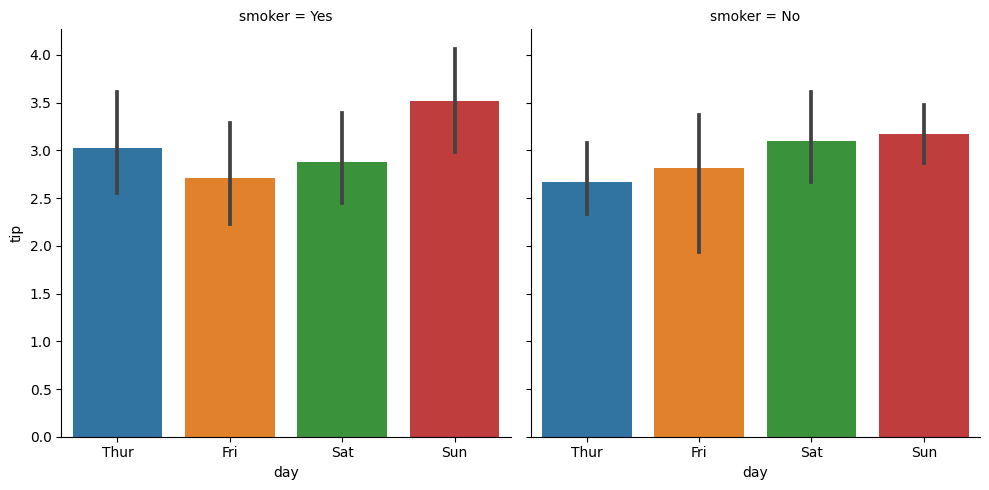

In [ ]:
sns.catplot(data=tips, x='day', y='tip',
            col='smoker',
            kind='bar'
            )
plt.show()

* 요일별 팁의 평균 막대 그래프
* 시간(Lunch, Dinner) 별로 subplot을 생성

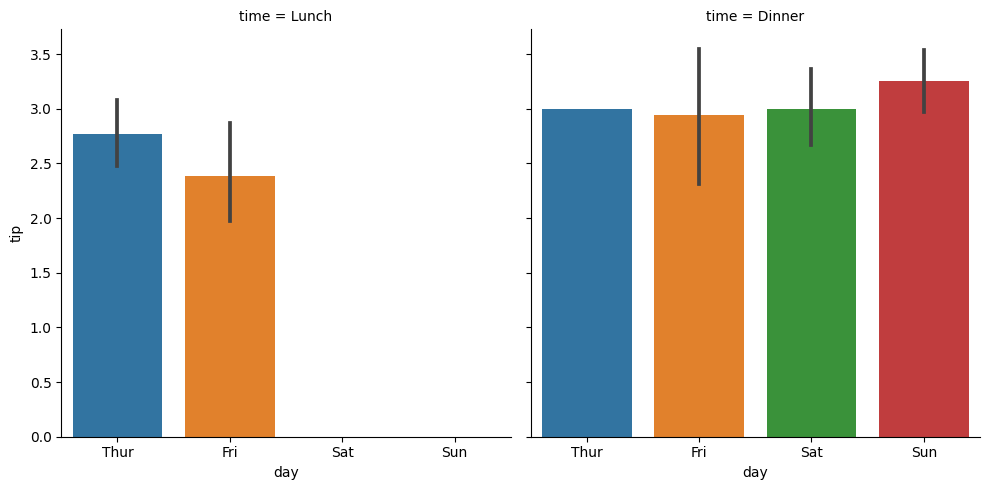

In [ ]:
sns.catplot(data=tips, x='day', y='tip', col='time', kind='bar')
plt.show()

* 요일별 팁의 평균 막대 그래프
* 흡연여부별로 subplot을 생성 col
* 시간별 subplot을 생성 row

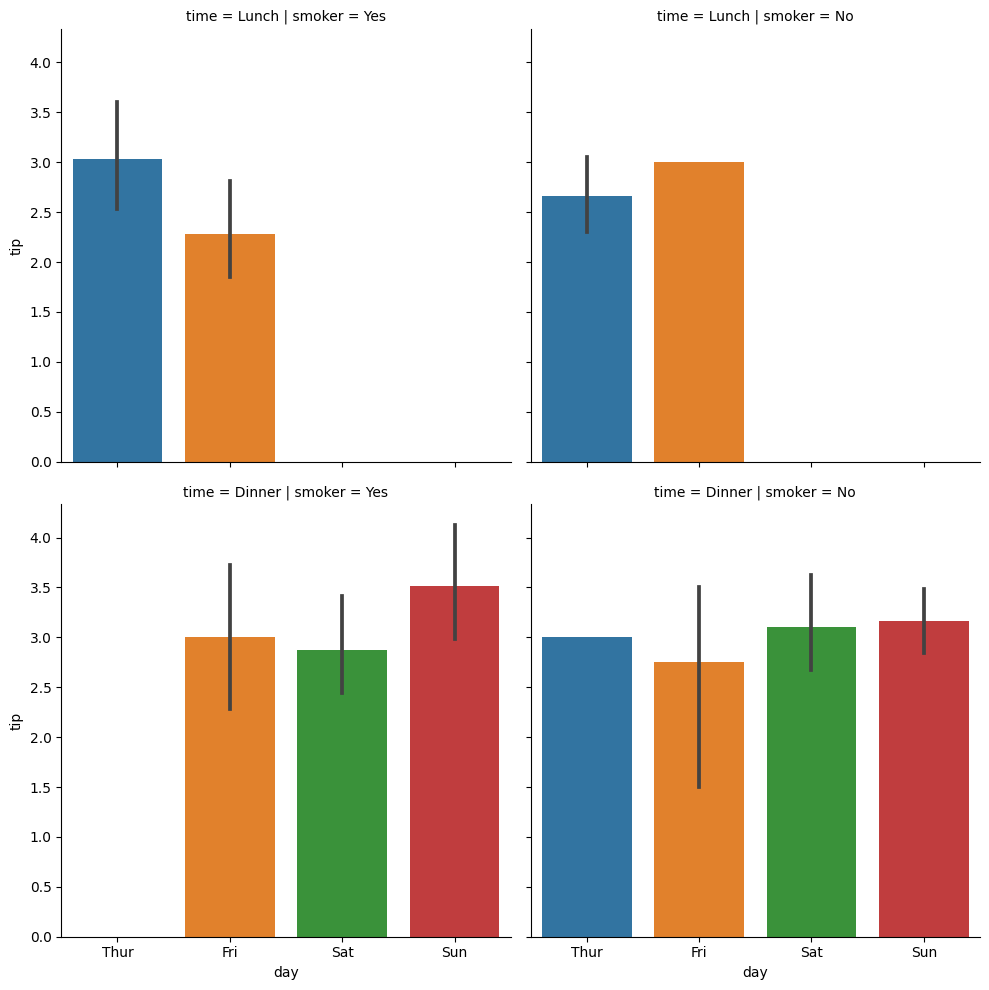

In [ ]:
sns.catplot(data=tips, x='day', y='tip', col='smoker', row='time', kind='bar')
plt.show()

* 요일별 성별 팁의 막대 그래프
* 시간별 subplot

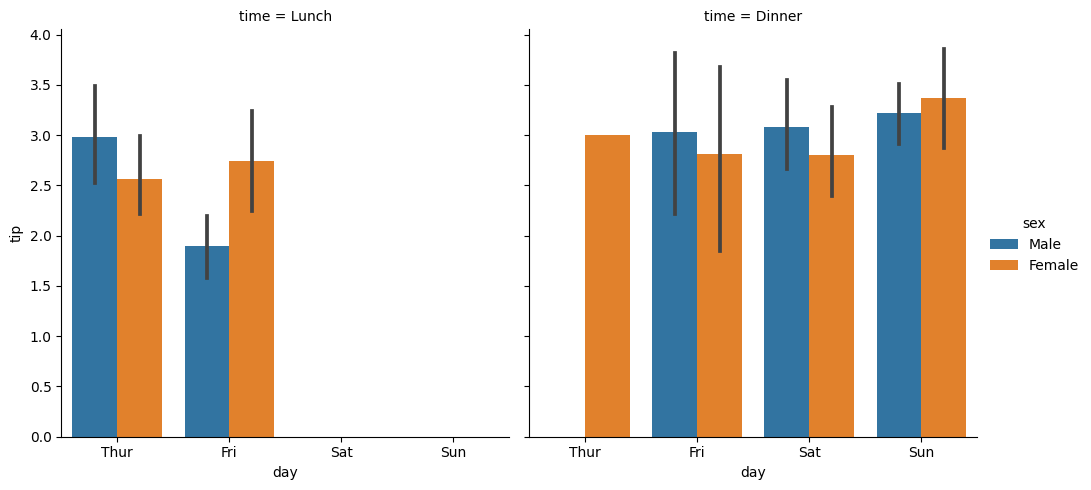

In [ ]:
sns.catplot(data=tips, x='day', y='tip', hue='sex', col='time', kind='bar')
plt.show()

* 성별 tip의 box plot
* 요일별 subplot

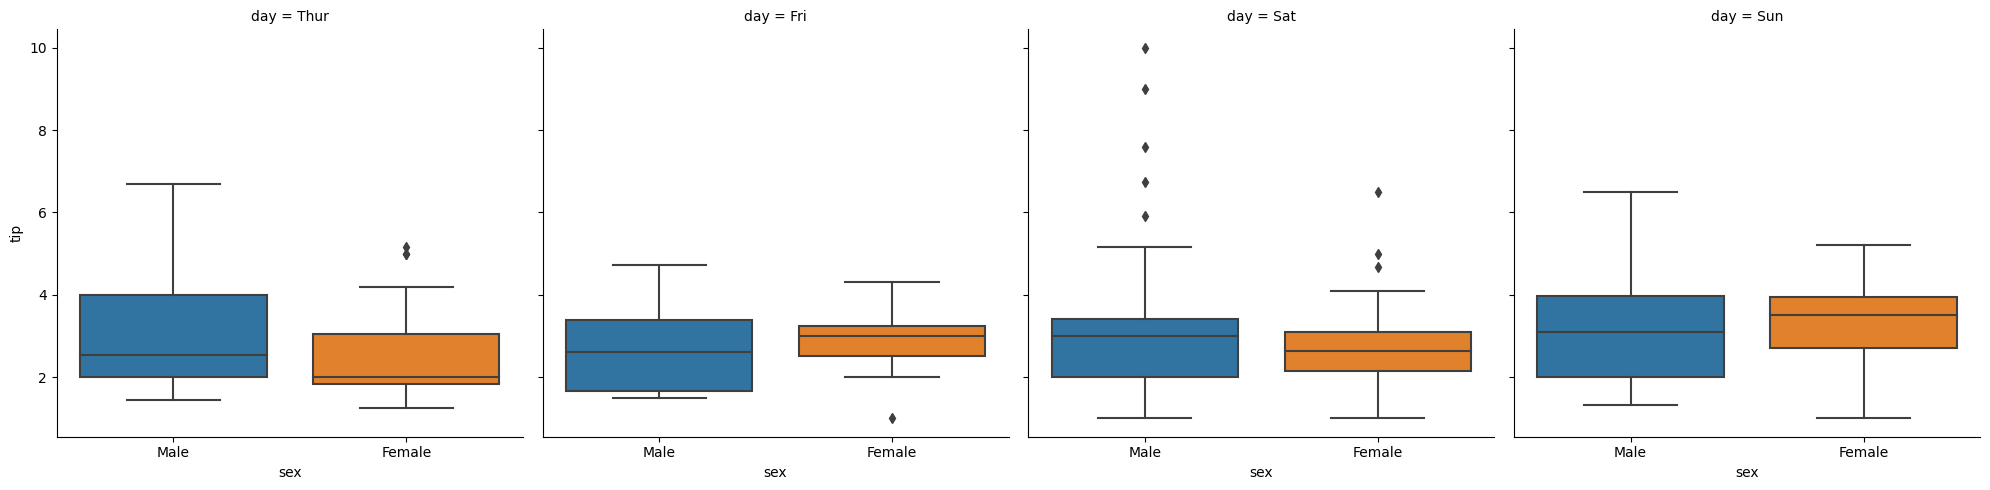

In [ ]:
sns.catplot(data=tips, x='sex', y='tip', col='day', kind='box')
plt.show()